# 自由平面上の移動

## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## 定数の設定

In [2]:
SIZE_X = 20#移動できる範囲
SIZE_Y = 10#5#移動できる範囲
VEL = 1.0#速度
NUM_AGENT = 40#20#エージェントの数
NUM_ROLE = 2
RANGE_Separate = 1#分離ルールの範囲

## エージェントクラス

In [3]:
class Agent():
    def __init__(self, id):
        self.pos = np.array([np.random.uniform(-SIZE_X,SIZE_X),np.random.uniform(-SIZE_Y,SIZE_Y)])
        self.role = np.random.randint(2)
        self.vel = np.array([VEL,0]) if self.role==0 else np.array([-VEL,0])
        self.id =  id
    def Move(self, A):
        tmp_v = self.RuleGoal(A)+self.RuleSeparate(A)+self.RuleFollow(A)
        self.vel = tmp_v/np.linalg.norm(tmp_v)
        self.pos += self.vel
        #フィールドからはみ出た場合の処理
        if self.pos[0]<-SIZE_X:self.pos[0]+=SIZE_X*2
        if self.pos[0]>SIZE_X:self.pos[0]-=SIZE_X*2
        if self.pos[1]<-SIZE_Y:self.pos[1]+=SIZE_Y*2
        if self.pos[1]>SIZE_Y:self.pos[1]-=SIZE_Y*2

    def Distance(self, A):#他のエージェントとの距離の計算
        self.dist = []
        for i in range(NUM_AGENT):
            d = self.pos- A[i].pos
            self.dist.append(np.linalg.norm(d))
    def RuleGoal(self, A):#目標方向への速度設定
        v = np.array([VEL,0]) if self.role==0 else np.array([-VEL,0])
        return v
    def RuleSeparate(self, A):#他のエージェントから離れる速度設定
        a = np.array(np.where(np.array(self.dist)<RANGE_Separate), dtype=int)[0]
        v = np.zeros(2)
        n = 0
        for i in a:
            if i != self.id:
                d = self.pos- A[i].pos
                v += d / self.dist[i]**2
                n +=1
        if n == 0:
            return 0
        return v/n
    def RuleFollow(self, A):#他のエージェントの速度に近づく速度設定
        a = np.array(np.where(np.array(self.dist)<RANGE_Separate*5), dtype=int)[0]
        v = np.zeros(2)
        n = 0
        for i in a:
            if i != self.id and A[i].role == self.role:
                d = A[i].pos - self.pos
                v += d / self.dist[i]**2
                n +=1
        if n == 0:
            return 0
        return v/n

## 表示のための設定

In [4]:
def MakeField(A):
    px = []
    py = []
    pc = []
    #カラー表示の場合
    cmap = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'lightblue', 'orange','lightgreen','lightgrey', 'gold']
    #白黒表示の場合
#    cmap = ['k','grey', 'lightgrey']
#    cmap = [[1-i/(NUM_ROLE-1),1-i/(NUM_ROLE-1),1-i/(NUM_ROLE-1)] for i in range(NUM_ROLE)]
    for i in range(NUM_AGENT):
        px.append(A[i].pos[0])
        py.append(A[i].pos[1])
        pc.append(cmap[A[i].role])
    return px,py,pc

## エージェントの移動

In [5]:
def Simulate(A):
    for i in range(NUM_AGENT):
        A[i].Distance(A)        
    for i in range(NUM_AGENT):
        A[i].Move(A)

## 実行と表示

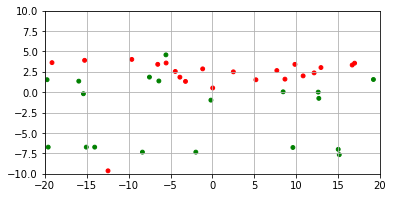

In [9]:
np.random.seed( 0 )
A = [Agent(i) for i in range(NUM_AGENT)]

figsize =  (6,6*SIZE_Y/SIZE_X) if SIZE_Y<SIZE_X else (6*SIZE_X/SIZE_Y,6)
makersize = 300/SIZE_X if SIZE_Y<SIZE_X else 30/SIZE_Y
fig, ax = plt.subplots(figsize = figsize)

def update(k):
    px,py,pc = MakeField(A)
    ax.cla()
    ax.set_xlim(-SIZE_X, SIZE_X)
    ax.set_ylim(-SIZE_Y, SIZE_Y)
    ax.grid(True)
    ax.scatter(px,py,c=pc,marker="o", s=makersize)#ランダム
    Simulate(A)

ani = animation.FuncAnimation(fig, update, interval = 100, frames = 200, repeat=False)
HTML(ani.to_jshtml())

## Anacondaを利用した場合gifアニメーションが生成される

In [10]:
pip install Pillow 

Note: you may need to restart the kernel to use updated packages.


In [11]:
ani.save("walk_free_follow_40.gif")#gifアニメーションファイルの保存

MovieWriter ffmpeg unavailable; using Pillow instead.
